In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
#import tensorflow as tf
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#from keras import backend as K
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
sns.set()
%matplotlib inline

In [2]:
raw_data=pd.read_csv('training-data.csv')
raw_data

T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
5      19.890000  46.026667  19.200000  44.500000  19.790000  44.933333   
6      19.890000  45.766667  19.200000  44.500000  19.790000  44.900000   
7      19.856667  45.560000  19.200000  44.500000  19.730000  44.900000   
8      19.790000  45.597500  19.200000  44.433333  19.730000  44.790000   
9      19.856667  46.090000  19.230000  44.400000  19.790000  44.863333   
10     19.926667  45.863333  19.356667  44.400000  19.790000  44.900000   
11     20.066667  46.396667  19.426667  44.400000  19.790000  44.826667   
12     20.133333  48.000000  19.566667  44.400000  19.890000  44.900000   
13     20.260000  52.726667  19.730000  45.100000  19.890000  45.493333   
14     20.426667  55.893333  19.856667  45.833333  20.033333  47.526667   
15     20.566667  53.893333  20.033333  46.756667  20.100000  48.466667   
16     20.730000  52.660000  20.166667  47.223333  20.200000  48.530000   
17     20.856667  53.660000  20.200000  47.056667  20.200000  48.447500   
18     20.890000  51.193333  20.200000  46.330000  20.200000  48.193333   
19     20.890000  49.800000  20.200000  46.026667  20.166667  47.633333   
20     20.890000  48.433333  20.200000  45.722500  20.166667  47.300000   
21     20.963333  47.633333  20.260000  45.530000  20.200000  47.026667   
22     21.033333  47.063333  20.290000  45.223333  20.260000  46.826667   
23     21.100000  46.596667  20.356667  44.963333  20.290000  46.633333   
24     21.133333  46.060000  20.426667  44.760000  20.290000  46.433333   
25     21.200000  45.800000  20.500000  44.760000  20.390000  46.223333   
26     21.290000  45.900000  20.533333  45.090000  20.390000  46.090000   
27     21.356667  45.826667  20.666667  45.163333  20.390000  46.090000   
28     21.390000  45.690000  20.700000  45.060000  20.390000  46.090000   
29     21.500000  45.333333  20.700000  44.933333  20.390000  46.060000   
...          ...        ...        ...        ...        ...        ...   
11969  22.000000  36.260000  20.100000  37.500000  22.633333  34.230000   
11970  22.000000  36.200000  20.100000  37.500000  22.700000  34.290000   
11971  22.000000  36.200000  20.100000  37.363333  22.700000  34.400000   
11972  22.033333  36.230000  20.100000  37.290000  22.700000  34.400000   
11973  22.100000  36.290000  20.066667  37.530000  22.700000  34.400000   
11974  22.100000  36.260000  20.000000  37.590000  22.700000  34.400000   
11975  22.100000  36.200000  20.000000  37.663333  22.700000  34.500000   
11976  22.100000  36.163333  20.066667  37.590000  22.700000  34.500000   
11977  22.100000  36.030000  20.100000  37.296667  22.700000  34.500000   
11978  22.133333  35.863333  20.100000  37.030000  22.700000  34.500000   
11979  22.133333  35.730000  20.100000  36.900000  22.700000  34.400000   
11980  22.133333  36.000000  20.033333  36.766667  22.600000  34.260000   
11981  22.200000  36.000000  20.000000  36.560000  22.600000  34.200000   
11982  22.200000  36.030000  20.075000  36.670000  22.600000  34.090000   
11983  22.200000  36.090000  20.100000  37.060000  22.600000  34.030000   
11984  22.200000  36.000000  20.000000  37.000000  22.566667  33.966667   
11985  22.200000  36.000000  20.000000  37.060000  22.566667  33.900000   
11986  22.166667  36.000000  19.890000  37.126667  22.500000  33.790000   
11987  22.100000  35.933333  19.890000  37.200000  22.500000  33.863333   
11988  22.166667  35.790000  19.856667  37.000000  22.500000  33.790000   
11989  22.100000  35.845000  19.790000  37.060000  22.500000  33.790000   
11990  22.100000  35.730000  19.790000 

In [3]:
raw_data=pd.read_csv('training-data.csv')
raw_data

T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
5      19.890000  46.026667  19.200000  44.500000  19.790000  44.933333   
6      19.890000  45.766667  19.200000  44.500000  19.790000  44.900000   
7      19.856667  45.560000  19.200000  44.500000  19.730000  44.900000   
8      19.790000  45.597500  19.200000  44.433333  19.730000  44.790000   
9      19.856667  46.090000  19.230000  44.400000  19.790000  44.863333   
10     19.926667  45.863333  19.356667  44.400000  19.790000  44.900000   
11     20.066667  46.396667  19.426667  44.400000  19.790000  44.826667   
12     20.133333  48.000000  19.566667  44.400000  19.890000  44.900000   
13     20.260000  52.726667  19.730000  45.100000  19.890000  45.493333   
14     20.426667  55.893333  19.856667  45.833333  20.033333  47.526667   
15     20.566667  53.893333  20.033333  46.756667  20.100000  48.466667   
16     20.730000  52.660000  20.166667  47.223333  20.200000  48.530000   
17     20.856667  53.660000  20.200000  47.056667  20.200000  48.447500   
18     20.890000  51.193333  20.200000  46.330000  20.200000  48.193333   
19     20.890000  49.800000  20.200000  46.026667  20.166667  47.633333   
20     20.890000  48.433333  20.200000  45.722500  20.166667  47.300000   
21     20.963333  47.633333  20.260000  45.530000  20.200000  47.026667   
22     21.033333  47.063333  20.290000  45.223333  20.260000  46.826667   
23     21.100000  46.596667  20.356667  44.963333  20.290000  46.633333   
24     21.133333  46.060000  20.426667  44.760000  20.290000  46.433333   
25     21.200000  45.800000  20.500000  44.760000  20.390000  46.223333   
26     21.290000  45.900000  20.533333  45.090000  20.390000  46.090000   
27     21.356667  45.826667  20.666667  45.163333  20.390000  46.090000   
28     21.390000  45.690000  20.700000  45.060000  20.390000  46.090000   
29     21.500000  45.333333  20.700000  44.933333  20.390000  46.060000   
...          ...        ...        ...        ...        ...        ...   
11969  22.000000  36.260000  20.100000  37.500000  22.633333  34.230000   
11970  22.000000  36.200000  20.100000  37.500000  22.700000  34.290000   
11971  22.000000  36.200000  20.100000  37.363333  22.700000  34.400000   
11972  22.033333  36.230000  20.100000  37.290000  22.700000  34.400000   
11973  22.100000  36.290000  20.066667  37.530000  22.700000  34.400000   
11974  22.100000  36.260000  20.000000  37.590000  22.700000  34.400000   
11975  22.100000  36.200000  20.000000  37.663333  22.700000  34.500000   
11976  22.100000  36.163333  20.066667  37.590000  22.700000  34.500000   
11977  22.100000  36.030000  20.100000  37.296667  22.700000  34.500000   
11978  22.133333  35.863333  20.100000  37.030000  22.700000  34.500000   
11979  22.133333  35.730000  20.100000  36.900000  22.700000  34.400000   
11980  22.133333  36.000000  20.033333  36.766667  22.600000  34.260000   
11981  22.200000  36.000000  20.000000  36.560000  22.600000  34.200000   
11982  22.200000  36.030000  20.075000  36.670000  22.600000  34.090000   
11983  22.200000  36.090000  20.100000  37.060000  22.600000  34.030000   
11984  22.200000  36.000000  20.000000  37.000000  22.566667  33.966667   
11985  22.200000  36.000000  20.000000  37.060000  22.566667  33.900000   
11986  22.166667  36.000000  19.890000  37.126667  22.500000  33.790000   
11987  22.100000  35.933333  19.890000  37.200000  22.500000  33.863333   
11988  22.166667  35.790000  19.856667  37.000000  22.500000  33.790000   
11989  22.100000  35.845000  19.790000  37.060000  22.500000  33.790000   
11990  22.100000  35.730000  19.790000 

In [4]:
raw_data=pd.read_csv('training-data.csv')
raw_data

T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
5      19.890000  46.026667  19.200000  44.500000  19.790000  44.933333   
6      19.890000  45.766667  19.200000  44.500000  19.790000  44.900000   
7      19.856667  45.560000  19.200000  44.500000  19.730000  44.900000   
8      19.790000  45.597500  19.200000  44.433333  19.730000  44.790000   
9      19.856667  46.090000  19.230000  44.400000  19.790000  44.863333   
10     19.926667  45.863333  19.356667  44.400000  19.790000  44.900000   
11     20.066667  46.396667  19.426667  44.400000  19.790000  44.826667   
12     20.133333  48.000000  19.566667  44.400000  19.890000  44.900000   
13     20.260000  52.726667  19.730000  45.100000  19.890000  45.493333   
14     20.426667  55.893333  19.856667  45.833333  20.033333  47.526667   
15     20.566667  53.893333  20.033333  46.756667  20.100000  48.466667   
16     20.730000  52.660000  20.166667  47.223333  20.200000  48.530000   
17     20.856667  53.660000  20.200000  47.056667  20.200000  48.447500   
18     20.890000  51.193333  20.200000  46.330000  20.200000  48.193333   
19     20.890000  49.800000  20.200000  46.026667  20.166667  47.633333   
20     20.890000  48.433333  20.200000  45.722500  20.166667  47.300000   
21     20.963333  47.633333  20.260000  45.530000  20.200000  47.026667   
22     21.033333  47.063333  20.290000  45.223333  20.260000  46.826667   
23     21.100000  46.596667  20.356667  44.963333  20.290000  46.633333   
24     21.133333  46.060000  20.426667  44.760000  20.290000  46.433333   
25     21.200000  45.800000  20.500000  44.760000  20.390000  46.223333   
26     21.290000  45.900000  20.533333  45.090000  20.390000  46.090000   
27     21.356667  45.826667  20.666667  45.163333  20.390000  46.090000   
28     21.390000  45.690000  20.700000  45.060000  20.390000  46.090000   
29     21.500000  45.333333  20.700000  44.933333  20.390000  46.060000   
...          ...        ...        ...        ...        ...        ...   
11969  22.000000  36.260000  20.100000  37.500000  22.633333  34.230000   
11970  22.000000  36.200000  20.100000  37.500000  22.700000  34.290000   
11971  22.000000  36.200000  20.100000  37.363333  22.700000  34.400000   
11972  22.033333  36.230000  20.100000  37.290000  22.700000  34.400000   
11973  22.100000  36.290000  20.066667  37.530000  22.700000  34.400000   
11974  22.100000  36.260000  20.000000  37.590000  22.700000  34.400000   
11975  22.100000  36.200000  20.000000  37.663333  22.700000  34.500000   
11976  22.100000  36.163333  20.066667  37.590000  22.700000  34.500000   
11977  22.100000  36.030000  20.100000  37.296667  22.700000  34.500000   
11978  22.133333  35.863333  20.100000  37.030000  22.700000  34.500000   
11979  22.133333  35.730000  20.100000  36.900000  22.700000  34.400000   
11980  22.133333  36.000000  20.033333  36.766667  22.600000  34.260000   
11981  22.200000  36.000000  20.000000  36.560000  22.600000  34.200000   
11982  22.200000  36.030000  20.075000  36.670000  22.600000  34.090000   
11983  22.200000  36.090000  20.100000  37.060000  22.600000  34.030000   
11984  22.200000  36.000000  20.000000  37.000000  22.566667  33.966667   
11985  22.200000  36.000000  20.000000  37.060000  22.566667  33.900000   
11986  22.166667  36.000000  19.890000  37.126667  22.500000  33.790000   
11987  22.100000  35.933333  19.890000  37.200000  22.500000  33.863333   
11988  22.166667  35.790000  19.856667  37.000000  22.500000  33.790000   
11989  22.100000  35.845000  19.790000  37.060000  22.500000  33.790000   
11990  22.100000  35.730000  19.790000 

In [5]:
raw_data['Appliances'].describe()

count    11999.000000
mean       100.573381
std        104.804907
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

In [6]:
print("Skewness : %f" % raw_data['Appliances'].skew())
print("Kurtosis : %f" % raw_data['Appliances'].kurt())

Skewness : 3.291222
Kurtosis : 12.894820


In [7]:
#We need to check info() to know if there's any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 28 columns):
T1             11999 non-null float64
RH_1           11999 non-null float64
T2             11999 non-null float64
RH_2           11999 non-null float64
T3             11999 non-null float64
RH_3           11999 non-null float64
T4             11999 non-null float64
RH_4           11999 non-null float64
T5             11999 non-null float64
RH_5           11999 non-null float64
T6             11999 non-null float64
RH_6           11999 non-null float64
T7             11999 non-null float64
RH_7           11999 non-null float64
T8             11999 non-null float64
RH_8           11999 non-null float64
T9             11999 non-null float64
RH_9           11999 non-null float64
T_out          11999 non-null float64
Press_mm_hg    11999 non-null float64
RH_out         11999 non-null float64
Windspeed      11999 non-null float64
Visibility     11999 non-null float64
Tdewpoint      11

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


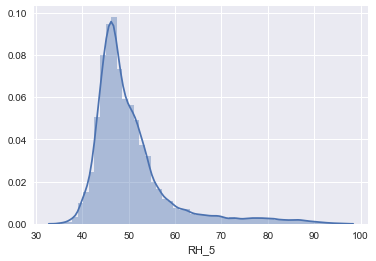

In [8]:
sns.distplot(raw_data.loc[:, 'RH_5'])

In [9]:
log_rh5 = raw_data[['RH_5']].applymap(lambda x: np.log(x+1))
log_rh5

RH_5
0      4.028917
1      4.028917
2      4.026958
3      4.026958
4      4.026958
5      4.025887
6      4.024756
7      4.023564
8      4.025352
9      4.025352
10     4.025352
11     4.025352
12     4.026958
13     4.028264
14     4.034241
15     4.043797
16     4.051611
17     4.059293
18     4.061477
19     4.272863
20     4.382027
21     4.391110
22     4.385230
23     4.374414
24     4.424367
25     4.425924
26     4.276527
27     4.149937
28     4.094844
29     4.055719
...         ...
11969  3.839452
11970  3.837299
11971  3.837299
11972  3.835862
11973  3.832980
11974  3.831536
11975  3.825593
11976  3.817493
11977  3.810138
11978  3.802134
11979  3.794309
11980  3.791586
11981  3.784796
11982  3.781914
11983  3.774139
11984  3.771227
11985  3.767228
11986  3.764142
11987  3.758017
11988  3.754901
11989  3.753340
11990  3.748641
11991  3.749504
11992  3.747934
11993  3.746283
11994  3.743131
11995  3.739810
11996  3.739810
11997  3.736876
11998  3.735286

[11999 rows x 1 columns]

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


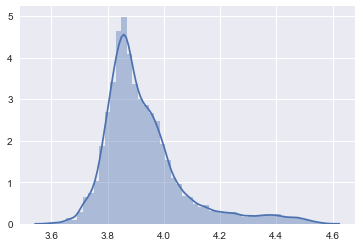

In [10]:
sns.distplot(log_rh5)

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


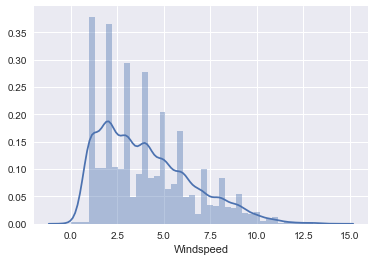

In [11]:
sns.distplot(raw_data.loc[:, 'Windspeed'])

In [12]:
log_windspeed = raw_data[['Windspeed']].applymap(lambda x: np.log(x+1))
log_windspeed.describe()

Windspeed
count  11999.000000
mean       1.500432
std        0.491870
min        0.000000
25%        1.098612
50%        1.540445
75%        1.897120
max        2.708050

In [13]:
copy_data = pd.DataFrame.copy(raw_data)

In [14]:
copy_data

T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
5      19.890000  46.026667  19.200000  44.500000  19.790000  44.933333   
6      19.890000  45.766667  19.200000  44.500000  19.790000  44.900000   
7      19.856667  45.560000  19.200000  44.500000  19.730000  44.900000   
8      19.790000  45.597500  19.200000  44.433333  19.730000  44.790000   
9      19.856667  46.090000  19.230000  44.400000  19.790000  44.863333   
10     19.926667  45.863333  19.356667  44.400000  19.790000  44.900000   
11     20.066667  46.396667  19.426667  44.400000  19.790000  44.826667   
12     20.133333  48.000000  19.566667  44.400000  19.890000  44.900000   
13     20.260000  52.726667  19.730000  45.100000  19.890000  45.493333   
14     20.426667  55.893333  19.856667  45.833333  20.033333  47.526667   
15     20.566667  53.893333  20.033333  46.756667  20.100000  48.466667   
16     20.730000  52.660000  20.166667  47.223333  20.200000  48.530000   
17     20.856667  53.660000  20.200000  47.056667  20.200000  48.447500   
18     20.890000  51.193333  20.200000  46.330000  20.200000  48.193333   
19     20.890000  49.800000  20.200000  46.026667  20.166667  47.633333   
20     20.890000  48.433333  20.200000  45.722500  20.166667  47.300000   
21     20.963333  47.633333  20.260000  45.530000  20.200000  47.026667   
22     21.033333  47.063333  20.290000  45.223333  20.260000  46.826667   
23     21.100000  46.596667  20.356667  44.963333  20.290000  46.633333   
24     21.133333  46.060000  20.426667  44.760000  20.290000  46.433333   
25     21.200000  45.800000  20.500000  44.760000  20.390000  46.223333   
26     21.290000  45.900000  20.533333  45.090000  20.390000  46.090000   
27     21.356667  45.826667  20.666667  45.163333  20.390000  46.090000   
28     21.390000  45.690000  20.700000  45.060000  20.390000  46.090000   
29     21.500000  45.333333  20.700000  44.933333  20.390000  46.060000   
...          ...        ...        ...        ...        ...        ...   
11969  22.000000  36.260000  20.100000  37.500000  22.633333  34.230000   
11970  22.000000  36.200000  20.100000  37.500000  22.700000  34.290000   
11971  22.000000  36.200000  20.100000  37.363333  22.700000  34.400000   
11972  22.033333  36.230000  20.100000  37.290000  22.700000  34.400000   
11973  22.100000  36.290000  20.066667  37.530000  22.700000  34.400000   
11974  22.100000  36.260000  20.000000  37.590000  22.700000  34.400000   
11975  22.100000  36.200000  20.000000  37.663333  22.700000  34.500000   
11976  22.100000  36.163333  20.066667  37.590000  22.700000  34.500000   
11977  22.100000  36.030000  20.100000  37.296667  22.700000  34.500000   
11978  22.133333  35.863333  20.100000  37.030000  22.700000  34.500000   
11979  22.133333  35.730000  20.100000  36.900000  22.700000  34.400000   
11980  22.133333  36.000000  20.033333  36.766667  22.600000  34.260000   
11981  22.200000  36.000000  20.000000  36.560000  22.600000  34.200000   
11982  22.200000  36.030000  20.075000  36.670000  22.600000  34.090000   
11983  22.200000  36.090000  20.100000  37.060000  22.600000  34.030000   
11984  22.200000  36.000000  20.000000  37.000000  22.566667  33.966667   
11985  22.200000  36.000000  20.000000  37.060000  22.566667  33.900000   
11986  22.166667  36.000000  19.890000  37.126667  22.500000  33.790000   
11987  22.100000  35.933333  19.890000  37.200000  22.500000  33.863333   
11988  22.166667  35.790000  19.856667  37.000000  22.500000  33.790000   
11989  22.100000  35.845000  19.790000  37.060000  22.500000  33.790000   
11990  22.100000  35.730000  19.790000 

# Remove Features rv1 & rv2

In [147]:
new_copy_data=copy_data.copy()
new_copy_data=new_copy_data.drop(['rv1','rv2'],axis=1)
new_copy_data

T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
5      19.890000  46.026667  19.200000  44.500000  19.790000  44.933333   
6      19.890000  45.766667  19.200000  44.500000  19.790000  44.900000   
7      19.856667  45.560000  19.200000  44.500000  19.730000  44.900000   
8      19.790000  45.597500  19.200000  44.433333  19.730000  44.790000   
9      19.856667  46.090000  19.230000  44.400000  19.790000  44.863333   
10     19.926667  45.863333  19.356667  44.400000  19.790000  44.900000   
11     20.066667  46.396667  19.426667  44.400000  19.790000  44.826667   
12     20.133333  48.000000  19.566667  44.400000  19.890000  44.900000   
13     20.260000  52.726667  19.730000  45.100000  19.890000  45.493333   
14     20.426667  55.893333  19.856667  45.833333  20.033333  47.526667   
15     20.566667  53.893333  20.033333  46.756667  20.100000  48.466667   
16     20.730000  52.660000  20.166667  47.223333  20.200000  48.530000   
17     20.856667  53.660000  20.200000  47.056667  20.200000  48.447500   
18     20.890000  51.193333  20.200000  46.330000  20.200000  48.193333   
19     20.890000  49.800000  20.200000  46.026667  20.166667  47.633333   
20     20.890000  48.433333  20.200000  45.722500  20.166667  47.300000   
21     20.963333  47.633333  20.260000  45.530000  20.200000  47.026667   
22     21.033333  47.063333  20.290000  45.223333  20.260000  46.826667   
23     21.100000  46.596667  20.356667  44.963333  20.290000  46.633333   
24     21.133333  46.060000  20.426667  44.760000  20.290000  46.433333   
25     21.200000  45.800000  20.500000  44.760000  20.390000  46.223333   
26     21.290000  45.900000  20.533333  45.090000  20.390000  46.090000   
27     21.356667  45.826667  20.666667  45.163333  20.390000  46.090000   
28     21.390000  45.690000  20.700000  45.060000  20.390000  46.090000   
29     21.500000  45.333333  20.700000  44.933333  20.390000  46.060000   
...          ...        ...        ...        ...        ...        ...   
11969  22.000000  36.260000  20.100000  37.500000  22.633333  34.230000   
11970  22.000000  36.200000  20.100000  37.500000  22.700000  34.290000   
11971  22.000000  36.200000  20.100000  37.363333  22.700000  34.400000   
11972  22.033333  36.230000  20.100000  37.290000  22.700000  34.400000   
11973  22.100000  36.290000  20.066667  37.530000  22.700000  34.400000   
11974  22.100000  36.260000  20.000000  37.590000  22.700000  34.400000   
11975  22.100000  36.200000  20.000000  37.663333  22.700000  34.500000   
11976  22.100000  36.163333  20.066667  37.590000  22.700000  34.500000   
11977  22.100000  36.030000  20.100000  37.296667  22.700000  34.500000   
11978  22.133333  35.863333  20.100000  37.030000  22.700000  34.500000   
11979  22.133333  35.730000  20.100000  36.900000  22.700000  34.400000   
11980  22.133333  36.000000  20.033333  36.766667  22.600000  34.260000   
11981  22.200000  36.000000  20.000000  36.560000  22.600000  34.200000   
11982  22.200000  36.030000  20.075000  36.670000  22.600000  34.090000   
11983  22.200000  36.090000  20.100000  37.060000  22.600000  34.030000   
11984  22.200000  36.000000  20.000000  37.000000  22.566667  33.966667   
11985  22.200000  36.000000  20.000000  37.060000  22.566667  33.900000   
11986  22.166667  36.000000  19.890000  37.126667  22.500000  33.790000   
11987  22.100000  35.933333  19.890000  37.200000  22.500000  33.863333   
11988  22.166667  35.790000  19.856667  37.000000  22.500000  33.790000   
11989  22.100000  35.845000  19.790000  37.060000  22.500000  33.790000   
11990  22.100000  35.730000  19.790000 

In [148]:
log_appliances = new_copy_data[['Appliances']].applymap(lambda x: np.log(x+1))
log_appliances

Appliances
0        4.110874
1        4.110874
2        3.931826
3        3.931826
4        4.110874
5        3.931826
6        4.110874
7        4.110874
8        4.110874
9        4.262680
10       5.442418
11       6.364751
12       6.066108
13       5.525453
14       4.615121
15       4.615121
16       4.510860
17       4.262680
18       4.394449
19       4.948760
20       4.795791
21       5.252273
22       4.709530
23       4.709530
24       4.709530
25       4.709530
26       4.615121
27       4.615121
28       4.615121
29       4.615121
...           ...
11969    4.110874
11970    4.110874
11971    4.110874
11972    4.394449
11973    4.394449
11974    4.394449
11975    4.615121
11976    4.510860
11977    4.709530
11978    4.615121
11979    4.709530
11980    4.795791
11981    4.795791
11982    4.709530
11983    4.709530
11984    4.709530
11985    4.709530
11986    4.709530
11987    4.615121
11988    4.615121
11989    4.510860
11990    4.262680
11991    4.615121
11992    4.615121
11993    4.795791
11994    4.709530
11995    4.709530
11996    4.709530
11997    4.709530
11998    4.709530

[11999 rows x 1 columns]

In [149]:
log_lights = new_copy_data[['lights']].applymap(lambda x: np.log(x+1))

In [150]:
log_lights

lights
0      3.433987
1      3.433987
2      3.433987
3      3.713572
4      3.713572
5      3.713572
6      3.931826
7      3.931826
8      3.713572
9      3.713572
10     4.262680
11     4.110874
12     3.931826
13     3.713572
14     2.397895
15     2.397895
16     2.397895
17     3.433987
18     3.433987
19     3.713572
20     3.044522
21     3.713572
22     3.713572
23     3.713572
24     3.433987
25     3.044522
26     3.433987
27     3.044522
28     3.044522
29     3.044522
...         ...
11969  2.397895
11970  0.000000
11971  0.000000
11972  0.000000
11973  0.000000
11974  0.000000
11975  0.000000
11976  0.000000
11977  0.000000
11978  0.000000
11979  0.000000
11980  0.000000
11981  0.000000
11982  0.000000
11983  0.000000
11984  0.000000
11985  0.000000
11986  0.000000
11987  0.000000
11988  0.000000
11989  0.000000
11990  0.000000
11991  0.000000
11992  0.000000
11993  0.000000
11994  0.000000
11995  0.000000
11996  2.397895
11997  0.000000
11998  0.000000

[11999 rows x 1 columns]

In [151]:
new_copy_data['Appliances']=log_appliances
new_copy_data['lights']=log_lights

In [152]:
new_copy_data

T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
5      19.890000  46.026667  19.200000  44.500000  19.790000  44.933333   
6      19.890000  45.766667  19.200000  44.500000  19.790000  44.900000   
7      19.856667  45.560000  19.200000  44.500000  19.730000  44.900000   
8      19.790000  45.597500  19.200000  44.433333  19.730000  44.790000   
9      19.856667  46.090000  19.230000  44.400000  19.790000  44.863333   
10     19.926667  45.863333  19.356667  44.400000  19.790000  44.900000   
11     20.066667  46.396667  19.426667  44.400000  19.790000  44.826667   
12     20.133333  48.000000  19.566667  44.400000  19.890000  44.900000   
13     20.260000  52.726667  19.730000  45.100000  19.890000  45.493333   
14     20.426667  55.893333  19.856667  45.833333  20.033333  47.526667   
15     20.566667  53.893333  20.033333  46.756667  20.100000  48.466667   
16     20.730000  52.660000  20.166667  47.223333  20.200000  48.530000   
17     20.856667  53.660000  20.200000  47.056667  20.200000  48.447500   
18     20.890000  51.193333  20.200000  46.330000  20.200000  48.193333   
19     20.890000  49.800000  20.200000  46.026667  20.166667  47.633333   
20     20.890000  48.433333  20.200000  45.722500  20.166667  47.300000   
21     20.963333  47.633333  20.260000  45.530000  20.200000  47.026667   
22     21.033333  47.063333  20.290000  45.223333  20.260000  46.826667   
23     21.100000  46.596667  20.356667  44.963333  20.290000  46.633333   
24     21.133333  46.060000  20.426667  44.760000  20.290000  46.433333   
25     21.200000  45.800000  20.500000  44.760000  20.390000  46.223333   
26     21.290000  45.900000  20.533333  45.090000  20.390000  46.090000   
27     21.356667  45.826667  20.666667  45.163333  20.390000  46.090000   
28     21.390000  45.690000  20.700000  45.060000  20.390000  46.090000   
29     21.500000  45.333333  20.700000  44.933333  20.390000  46.060000   
...          ...        ...        ...        ...        ...        ...   
11969  22.000000  36.260000  20.100000  37.500000  22.633333  34.230000   
11970  22.000000  36.200000  20.100000  37.500000  22.700000  34.290000   
11971  22.000000  36.200000  20.100000  37.363333  22.700000  34.400000   
11972  22.033333  36.230000  20.100000  37.290000  22.700000  34.400000   
11973  22.100000  36.290000  20.066667  37.530000  22.700000  34.400000   
11974  22.100000  36.260000  20.000000  37.590000  22.700000  34.400000   
11975  22.100000  36.200000  20.000000  37.663333  22.700000  34.500000   
11976  22.100000  36.163333  20.066667  37.590000  22.700000  34.500000   
11977  22.100000  36.030000  20.100000  37.296667  22.700000  34.500000   
11978  22.133333  35.863333  20.100000  37.030000  22.700000  34.500000   
11979  22.133333  35.730000  20.100000  36.900000  22.700000  34.400000   
11980  22.133333  36.000000  20.033333  36.766667  22.600000  34.260000   
11981  22.200000  36.000000  20.000000  36.560000  22.600000  34.200000   
11982  22.200000  36.030000  20.075000  36.670000  22.600000  34.090000   
11983  22.200000  36.090000  20.100000  37.060000  22.600000  34.030000   
11984  22.200000  36.000000  20.000000  37.000000  22.566667  33.966667   
11985  22.200000  36.000000  20.000000  37.060000  22.566667  33.900000   
11986  22.166667  36.000000  19.890000  37.126667  22.500000  33.790000   
11987  22.100000  35.933333  19.890000  37.200000  22.500000  33.863333   
11988  22.166667  35.790000  19.856667  37.000000  22.500000  33.790000   
11989  22.100000  35.845000  19.790000  37.060000  22.500000  33.790000   
11990  22.100000  35.730000  19.790000 

# Using Multi-layer Perceptron regressor.

In [174]:
model= MLPRegressor(
    hidden_layer_sizes=(19,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=256,
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    momentum=0.9,
    verbose=1,
    early_stopping=True)

In [175]:
X_train=new_copy_data.loc[:, :'Tdewpoint']
X_train

'''X_train=raw_data.loc[:, :'rv2']
X_train'''

"X_train=raw_data.loc[:, :'rv2']\nX_train"

In [176]:
Y_train=new_copy_data.loc[:,'Appliances':]
Y_train

'''Y_train=raw_data.loc[:,'Appliances':]
Y_train'''

"Y_train=raw_data.loc[:,'Appliances':]\nY_train"

In [177]:
model.fit(X_train,Y_train)

Iteration 1, loss = 12017.71808199
Validation score: -8452.710640
Iteration 2, loss = 1571.44686158
Validation score: -728.038208
Iteration 3, loss = 138.42126233
Validation score: -142.729716
Iteration 4, loss = 57.97846374
Validation score: -125.393397
Iteration 5, loss = 54.45081568
Validation score: -119.001573
Iteration 6, loss = 51.48624144
Validation score: -111.978156
Iteration 7, loss = 48.23351448
Validation score: -104.285615
Iteration 8, loss = 44.63854612
Validation score: -95.975440
Iteration 9, loss = 40.75049648
Validation score: -86.891503
Iteration 10, loss = 36.49504114
Validation score: -74.720477
Iteration 11, loss = 28.44136675
Validation score: -50.147243
Iteration 12, loss = 18.18098649
Validation score: -29.067749
Iteration 13, loss = 10.25144897
Validation score: -15.619399
Iteration 14, loss = 6.52568401
Validation score: -10.489074
Iteration 15, loss = 4.85737980
Validation score: -8.052757
Iteration 16, loss = 3.57894431
Validation score: -4.820922
Iteratio

Iteration 147, loss = 0.42865824
Validation score: 0.089983
Iteration 148, loss = 0.41958649
Validation score: 0.100485
Iteration 149, loss = 0.41868013
Validation score: 0.086022
Iteration 150, loss = 0.41816878
Validation score: 0.101336
Iteration 151, loss = 0.43162391
Validation score: 0.105327
Iteration 152, loss = 0.42605245
Validation score: 0.038803
Iteration 153, loss = 0.42433528
Validation score: 0.047842
Iteration 154, loss = 0.42753934
Validation score: 0.072566
Iteration 155, loss = 0.42204046
Validation score: 0.102919
Iteration 156, loss = 0.42498263
Validation score: 0.107238
Iteration 157, loss = 0.41665457
Validation score: 0.085109
Iteration 158, loss = 0.41302324
Validation score: 0.087806
Iteration 159, loss = 0.41165901
Validation score: 0.116274
Iteration 160, loss = 0.41263108
Validation score: 0.064626
Iteration 161, loss = 0.41407621
Validation score: 0.071988
Iteration 162, loss = 0.41992161
Validation score: 0.103499
Iteration 163, loss = 0.41814679
Validat

MLPRegressor(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(19,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

# Predict the Appliances and Lights from data_testing 

In [178]:
newtestFeature=pd.read_csv('testing-data.csv')
newtestFeature=newtestFeature.drop(['rv1','rv2'],axis=1)
newtestFeature

T1       RH_1         T2       RH_2         T3       RH_3  \
0     19.290000  41.400000  18.200000  41.400000  19.700000  40.663333   
1     19.323333  41.400000  18.200000  41.400000  19.600000  40.590000   
2     19.323333  41.400000  18.200000  41.400000  19.600000  40.590000   
3     19.290000  41.400000  18.200000  41.400000  19.566667  40.590000   
4     19.290000  41.400000  18.200000  41.400000  19.550000  40.672500   
5     19.290000  41.290000  18.175000  41.475000  19.566667  40.700000   
6     19.290000  41.290000  18.100000  41.500000  19.600000  40.590000   
7     19.290000  41.290000  18.100000  41.560000  19.600000  40.590000   
8     19.290000  41.290000  18.100000  41.560000  19.566667  40.626667   
9     19.200000  41.200000  18.066667  41.560000  19.500000  40.700000   
10    19.200000  41.200000  18.000000  41.500000  19.500000  40.700000   
11    19.200000  41.200000  18.000000  41.500000  19.500000  40.700000   
12    19.200000  41.200000  17.926667  41.500000  19.500000  40.700000   
13    19.133333  41.126667  17.890000  41.530000  19.500000  40.700000   
14    19.100000  41.126667  17.890000  41.590000  19.500000  40.663333   
15    19.100000  41.126667  17.890000  41.590000  19.426667  40.530000   
16    19.100000  41.200000  17.823333  41.530000  19.390000  40.400000   
17    19.100000  41.000000  17.790000  41.560000  19.390000  40.326667   
18    19.100000  40.933333  17.790000  41.433333  19.356667  40.200000   
19    19.100000  41.000000  17.790000  41.463333  19.290000  40.260000   
20    19.100000  41.193333  17.790000  41.590000  19.290000  40.230000   
21    19.100000  41.466667  17.926667  41.860000  19.290000  40.290000   
22    19.230000  41.566667  18.066667  42.060000  19.390000  40.200000   
23    19.356667  41.960000  18.133333  41.933333  19.390000  40.050000   
24    19.696667  42.723333  18.292500  42.270000  19.530000  40.133333   
25    19.963333  42.530000  18.463333  42.633333  19.633333  40.330000   
26    20.100000  42.100000  18.700000  42.466667  19.700000  40.590000   
27    20.100000  41.826667  18.760000  42.526667  19.700000  40.590000   
28    20.133333  41.900000  18.926667  42.796667  19.760000  40.996667   
29    20.200000  41.693333  19.066667  42.530000  20.066667  42.733333   
...         ...        ...        ...        ...        ...        ...   
6970  24.421818  53.600636  23.319820  53.354895  27.429364  47.111818   
6971  24.417273  53.670545  23.302703  53.459910  27.439455  47.167273   
6972  24.412727  53.740455  23.285586  53.564925  27.449545  47.222727   
6973  24.408182  53.810364  23.268468  53.669940  27.459636  47.278182   
6974  24.403636  53.880273  23.251351  53.774955  27.469727  47.333636   
6975  24.399091  53.950182  23.234234  53.879970  27.479818  47.389091   
6976  24.394545  54.020091  23.217117  53.984985  27.489909  47.444545   
6977  24.390000  54.090000  23.200000  54.090000  27.500000  47.500000   
6978  24.426667  53.796667  23.260000  54.090000  27.663333  47.560000   
6979  24.500000  53.663333  23.323333  53.833333  27.856667  47.433333   
6980  24.500000  53.363333  23.323333  53.626667  28.033333  47.693333   
6981  24.426667  53.156667  23.390000  53.400000  28.100000  47.226667   
6982  24.426667  52.863333  23.463333  53.200000  27.963333  46.496667   
6983  24.500000  53.730000  23.600000  52.900000  27.890000  45.963333   
6984  24.533333  54.666667  23.666667  52.760000  27.726667  45.663333   
6985  24.600000  53.866667  23.700000  52.933333  27.533333  45.590000   
6986  24.600000  53.333333  23.700000  52.875000  27.260000  45.466667   
6987  24.666667  53.126667  23.760000  52.626667  27.133333  45.466667   
6988  24.700000  52.833333  23.790000  52.466667  26.963333  45.300000   
6989  24.700000  52.626667  23.790000  52.266667  26.823333  44.966667   
6990  24.700000  52.466667  23.890000  52.260000  26.760000  45.200000   
6991  24.700000  52.400000  23.963333  52.066667  26.625000  45.222500   
6992  24.700000  

In [179]:
model.out_activation_='relu'
predictions=model.predict(newtestFeature)
predictionsDataFrame=pd.DataFrame({'Appliances':predictions[:,0],'Lights':predictions[:,1]})
join=newtestFeature.join(predictionsDataFrame)
join

T1       RH_1         T2       RH_2         T3       RH_3  \
0     19.290000  41.400000  18.200000  41.400000  19.700000  40.663333   
1     19.323333  41.400000  18.200000  41.400000  19.600000  40.590000   
2     19.323333  41.400000  18.200000  41.400000  19.600000  40.590000   
3     19.290000  41.400000  18.200000  41.400000  19.566667  40.590000   
4     19.290000  41.400000  18.200000  41.400000  19.550000  40.672500   
5     19.290000  41.290000  18.175000  41.475000  19.566667  40.700000   
6     19.290000  41.290000  18.100000  41.500000  19.600000  40.590000   
7     19.290000  41.290000  18.100000  41.560000  19.600000  40.590000   
8     19.290000  41.290000  18.100000  41.560000  19.566667  40.626667   
9     19.200000  41.200000  18.066667  41.560000  19.500000  40.700000   
10    19.200000  41.200000  18.000000  41.500000  19.500000  40.700000   
11    19.200000  41.200000  18.000000  41.500000  19.500000  40.700000   
12    19.200000  41.200000  17.926667  41.500000  19.500000  40.700000   
13    19.133333  41.126667  17.890000  41.530000  19.500000  40.700000   
14    19.100000  41.126667  17.890000  41.590000  19.500000  40.663333   
15    19.100000  41.126667  17.890000  41.590000  19.426667  40.530000   
16    19.100000  41.200000  17.823333  41.530000  19.390000  40.400000   
17    19.100000  41.000000  17.790000  41.560000  19.390000  40.326667   
18    19.100000  40.933333  17.790000  41.433333  19.356667  40.200000   
19    19.100000  41.000000  17.790000  41.463333  19.290000  40.260000   
20    19.100000  41.193333  17.790000  41.590000  19.290000  40.230000   
21    19.100000  41.466667  17.926667  41.860000  19.290000  40.290000   
22    19.230000  41.566667  18.066667  42.060000  19.390000  40.200000   
23    19.356667  41.960000  18.133333  41.933333  19.390000  40.050000   
24    19.696667  42.723333  18.292500  42.270000  19.530000  40.133333   
25    19.963333  42.530000  18.463333  42.633333  19.633333  40.330000   
26    20.100000  42.100000  18.700000  42.466667  19.700000  40.590000   
27    20.100000  41.826667  18.760000  42.526667  19.700000  40.590000   
28    20.133333  41.900000  18.926667  42.796667  19.760000  40.996667   
29    20.200000  41.693333  19.066667  42.530000  20.066667  42.733333   
...         ...        ...        ...        ...        ...        ...   
6970  24.421818  53.600636  23.319820  53.354895  27.429364  47.111818   
6971  24.417273  53.670545  23.302703  53.459910  27.439455  47.167273   
6972  24.412727  53.740455  23.285586  53.564925  27.449545  47.222727   
6973  24.408182  53.810364  23.268468  53.669940  27.459636  47.278182   
6974  24.403636  53.880273  23.251351  53.774955  27.469727  47.333636   
6975  24.399091  53.950182  23.234234  53.879970  27.479818  47.389091   
6976  24.394545  54.020091  23.217117  53.984985  27.489909  47.444545   
6977  24.390000  54.090000  23.200000  54.090000  27.500000  47.500000   
6978  24.426667  53.796667  23.260000  54.090000  27.663333  47.560000   
6979  24.500000  53.663333  23.323333  53.833333  27.856667  47.433333   
6980  24.500000  53.363333  23.323333  53.626667  28.033333  47.693333   
6981  24.426667  53.156667  23.390000  53.400000  28.100000  47.226667   
6982  24.426667  52.863333  23.463333  53.200000  27.963333  46.496667   
6983  24.500000  53.730000  23.600000  52.900000  27.890000  45.963333   
6984  24.533333  54.666667  23.666667  52.760000  27.726667  45.663333   
6985  24.600000  53.866667  23.700000  52.933333  27.533333  45.590000   
6986  24.600000  53.333333  23.700000  52.875000  27.260000  45.466667   
6987  24.666667  53.126667  23.760000  52.626667  27.133333  45.466667   
6988  24.700000  52.833333  23.790000  52.466667  26.963333  45.300000   
6989  24.700000  52.626667  23.790000  52.266667  26.823333  44.966667   
6990  24.700000  52.466667  23.890000  52.260000  26.760000  45.200000   
6991  24.700000  52.400000  23.963333  52.066667  26.625000  45.222500   
6992  24.700000  

# Creating Mean Absolute Error

In [180]:
#Take Index Appliances and Lights from data_training
y_true=np.array(new_copy_data[['Appliances','lights']])

#Predict the Appliances and Lights from data_training  (For Calculate Mean Absolute Error)
y_pred=model.predict(X_train)

meanAbsoluteError=mean_absolute_error(y_true,y_pred,multioutput='raw_values')
meanAbsoluteError

array([0.4250374, 0.8973537])

In [181]:
y_true

array([[4.11087386, 3.4339872 ],
       [4.11087386, 3.4339872 ],
       [3.93182563, 3.4339872 ],
       ...,
       [4.7095302 , 2.39789527],
       [4.7095302 , 0.        ],
       [4.7095302 , 0.        ]])

In [182]:
y_pred

array([[4.34406146, 1.3039662 ],
       [4.32799553, 1.3553734 ],
       [4.31027932, 1.37317748],
       ...,
       [4.18461047, 0.68606665],
       [4.15506423, 0.67425496],
       [4.12804929, 0.68796656]])

# Using RandomForestRegressor

In [30]:
regressor=RandomForestRegressor(n_estimators=250,max_features='sqrt')

In [31]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
y_predictions=regressor.predict(newtestFeature)
y_predictions

array([[3.38509657, 0.04095283],
       [3.54424654, 0.08190567],
       [3.61828919, 0.16250849],
       ...,
       [4.93027622, 1.60621388],
       [4.94471346, 1.60415658],
       [4.93639906, 1.59042063]])

## Predicted Data Testing

In [33]:
predictionRFR=pd.DataFrame({'Appliances':y_predictions[:,0],'lights':y_predictions[:,1]})
predictionRFR[['Appliances','lights']] = predictionRFR[['Appliances','lights']].applymap(lambda x : np.int64(np.e**x))
#predictionRFR=np.int64(np.e ** predictionRFR)
predictionRFR

Appliances  lights
0             29       1
1             34       1
2             37       1
3             38       1
4             42       1
5             45       1
6             47       1
7             47       1
8             48       1
9             52       1
10            55       1
11            56       2
12            56       2
13            60       2
14            59       2
15            63       2
16            62       2
17            62       2
18            65       2
19            64       2
20            65       2
21            65       2
22            61       2
23            61       2
24            56       2
25            57       2
26            57       2
27            56       2
28            62       2
29            84       3
...          ...     ...
6970         120       4
6971         119       4
6972         118       4
6973         119       4
6974         120       4
6975         120       4
6976         122       4
6977         120       4
6978         121       4
6979         123       4
6980         122       4
6981         122       4
6982         122       4
6983         121       4
6984         121       4
6985         121       4
6986         121       4
6987         127       4
6988         127       4
6989         127       4
6990         134       5
6991         137       4
6992         138       5
6993         137       5
6994         137       5
6995         136       4
6996         138       4
6997         138       4
6998         140       4
6999         139       4

[7000 rows x 2 columns]

# Create Mean Absolute Error (for Random Forest Regressor)

In [34]:
y_true=np.array(new_copy_data[['Appliances','lights']])

In [35]:
y_pred=regressor.predict(X_train)

In [36]:
y_true

array([[4.11087386, 3.4339872 ],
       [4.11087386, 3.4339872 ],
       [3.93182563, 3.4339872 ],
       ...,
       [4.7095302 , 2.39789527],
       [4.7095302 , 0.        ],
       [4.7095302 , 0.        ]])

In [37]:
y_pred

array([[4.13559739, 3.35113583],
       [4.13536537, 3.38286775],
       [3.97474157, 3.48987731],
       ...,
       [4.69813842, 1.45091525],
       [4.67966022, 0.35046994],
       [4.6447247 , 0.22577938]])

In [38]:
inverseLogPredict=np.e**y_pred
inverseLogPredict=np.int64(inverseLogPredict)
inverseLogPredict

array([[ 62,  28],
       [ 62,  29],
       [ 53,  32],
       ...,
       [109,   4],
       [107,   1],
       [104,   1]])

In [145]:
meanAbsoluteErrorRFR=mean_absolute_error(y_true,y_pred,multioutput='raw_values')
meanAbsoluteErrorRFR

array([0.07889266, 0.15838283])

In [40]:
a=10**y_pred[0][0]

In [41]:
a

13664.614789637671

In [42]:
new_copy_data['Appliances'][0]

4.110873864173311

In [43]:
int(np.e ** (4.60517019))

100

In [44]:
a

13664.614789637671

In [45]:
from sklearn.model_selection import train_test_split

In [109]:
df_x = new_copy_data.loc[:, :'Tdewpoint']
df_y = new_copy_data.loc[:,'Appliances':]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [113]:
y_train

Appliances    lights
9182     4.615121  0.000000
10487    4.394449  3.044522
6428     3.713572  0.000000
288      4.510860  0.000000
2626     4.510860  3.044522
8862     3.931826  0.000000
3684     3.713572  0.000000
7971     4.394449  0.000000
6950     4.262680  2.397895
388      5.141664  3.044522
836      4.709530  0.000000
9023     3.931826  0.000000
3181     4.110874  3.044522
280      3.713572  0.000000
8113     4.262680  0.000000
4459     4.394449  3.044522
6298     3.433987  0.000000
5860     3.931826  0.000000
1112     3.931826  0.000000
3798     4.510860  2.397895
11143    3.433987  2.397895
11173    4.110874  0.000000
9854     3.931826  0.000000
4768     6.175867  0.000000
3421     4.394449  0.000000
8693     3.931826  0.000000
267      3.931826  0.000000
1598     4.394449  0.000000
4929     5.525453  0.000000
9563     3.931826  0.000000
...           ...       ...
9274     3.713572  0.000000
8666     3.931826  0.000000
11096    3.433987  0.000000
6396     3.433987  0.000000
3385     3.433987  0.000000
4555     3.931826  0.000000
1184     4.795791  3.044522
6420     4.110874  0.000000
5051     4.262680  0.000000
5311     5.638355  0.000000
2433     4.262680  3.044522
6949     5.252273  0.000000
10583    3.931826  0.000000
769      3.931826  0.000000
1685     3.931826  0.000000
8322     3.931826  2.397895
11111    4.510860  3.044522
11363    4.110874  2.397895
11636    4.394449  2.397895
5578     3.433987  0.000000
4426     3.931826  0.000000
466      3.931826  0.000000
6265     3.931826  3.044522
5734     3.931826  0.000000
11284    3.931826  0.000000
11964    4.262680  0.000000
5191     3.931826  0.000000
5390     4.110874  3.044522
860      4.394449  0.000000
7270     3.931826  0.000000

[9599 rows x 2 columns]

In [114]:
x_train

T1       RH_1         T2       RH_2         T3       RH_3  \
9182   22.100000  44.826667  19.500000  48.833333  24.323333  40.200000   
10487  21.390000  41.090000  19.230000  44.633333  22.790000  38.030000   
6428   21.100000  36.400000  17.633333  40.000000  22.290000  36.200000   
288    19.356667  40.790000  18.700000  39.730000  19.290000  42.000000   
2626   20.790000  38.363333  19.100000  38.826667  22.700000  36.710000   
8862   20.890000  42.290000  19.100000  44.966667  21.600000  39.090000   
3684   20.390000  36.626667  18.600000  37.290000  20.390000  37.200000   
7971   22.390000  38.290000  20.066667  40.966667  22.730000  37.626667   
6950   22.890000  38.266667  20.700000  37.800000  22.666667  35.863333   
388    18.533333  43.266667  18.100000  42.090000  19.166667  42.000000   
836    22.100000  38.260000  21.290000  36.326667  22.390000  39.930000   
9023   21.700000  44.590000  20.000000  46.700000  23.100000  41.730000   
3181   21.390000  42.363333  19.700000  42.760000  21.100000  41.290000   
280    19.267500  40.745000  18.700000  39.826667  19.290000  42.290000   
8113   23.390000  39.026667  21.033333  40.290000  23.290000  38.560000   
4459   20.200000  38.400000  19.390000  37.567500  19.917500  37.900000   
6298   20.500000  40.030000  17.200000  46.200000  20.890000  38.200000   
5860   20.290000  35.163333  16.700000  39.966667  20.200000  37.000000   
1112   21.600000  42.560000  20.890000  41.500000  23.100000  43.090000   
3798   21.700000  34.826667  20.390000  35.433333  21.100000  35.000000   
11143  21.700000  37.466667  19.633333  37.260000  22.500000  36.000000   
11173  21.100000  37.590000  18.500000  40.060000  22.600000  36.760000   
9854   22.290000  41.060000  19.890000  43.790000  22.790000  39.700000   
4768   19.790000  36.863333  18.000000  38.400000  20.133333  36.193333   
3421   20.290000  37.796667  18.200000  39.466667  20.767500  39.767500   
8693   21.700000  38.400000  19.633333  40.530000  22.200000  37.290000   
267    19.066667  41.760000  18.390000  41.030000  19.290000  42.933333   
1598   21.133333  39.860000  19.600000  39.500000  22.356667  40.333333   
4929   20.290000  39.566667  18.926667  38.790000  20.000000  37.663333   
9563   21.790000  38.500000  19.500000  40.433333  22.500000  37.900000   
...          ...        ...        ...        ...        ...        ...   
9274   22.840000  41.450000  20.100000  45.326667  24.500000  38.730000   
8666   22.200000  38.200000  21.230000  37.700000  22.390000  37.590000   
11096  21.790000  35.530000  22.566667  32.200000  22.500000  35.290000   
6396   22.390000  35.326667  19.633333  37.060000  22.790000  35.626667   
3385   21.426667  37.790000  19.500000  38.590000  20.600000  38.590000   
4555   21.275000  36.181667  19.200000  37.368571  20.890000  38.372500   
1184   22.390000  41.230000  21.963333  40.000000  22.390000  41.760000   
6420   21.390000  36.200000  18.000000  39.326667  22.390000  36.090000   
5051   21.200000  39.900000  19.790000  38.060000  22.823333  38.360000   
5311   19.390000  38.400000  16.390000  42.930000  20.000000  37.030000   
2433   19.600000  35.290000  18.033333  36.030000  19.600000  36.400000   
6949   22.790000  37.760000  20.790000  37.466667  22.666667  35.790000   
10583  22.390000  41.700000  20.356667  44.156667  23.500000  40.000000   
769    22.133333  39.560000  21.200000  38.290000  21.390000  42.326667   
1685   20.500000  38.200000  18.390000  39.400000  21.100000  40.090000   
8322   21.500000  40.500000  19.000000  44.200000  22.500000  38.290000   
11111  21.700000  35.863333  21.356667  33.500000  22.390000  34.790000   
11363  21.500000  39.490000  24.290000  33.266667  22.100000  37.230000   
11636  22.290000  39.226667  20.460000  39.693333  23.000000  36.590000   
5578   20.290000  36.200000  16.700000  41.790000  20.566667  37.400000   
4426   20.290000  37.790000  18.500000  38.790000  20.890000  39.200000   
466    23.260000  40.090000  22.390000 

In [49]:
regressorValidate=RandomForestRegressor(n_estimators=250,max_features='sqrt')

In [50]:
regressorValidate.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
validatePrediction=regressorValidate.predict(x_test)

In [142]:
len(validatePrediction)

reshapeList=np.reshape(validatePrediction[:,0:1],2400)

2400

In [73]:
len(validatePrediction[:,0:1])

reshapeList=np.reshape(validatePrediction[:,0:1],2400)

In [95]:
reshapeList = np.e ** reshapeList

In [126]:
inverse_log_app = np.e ** (y_test['Appliances'])

In [128]:
len(reshapeList)

2400

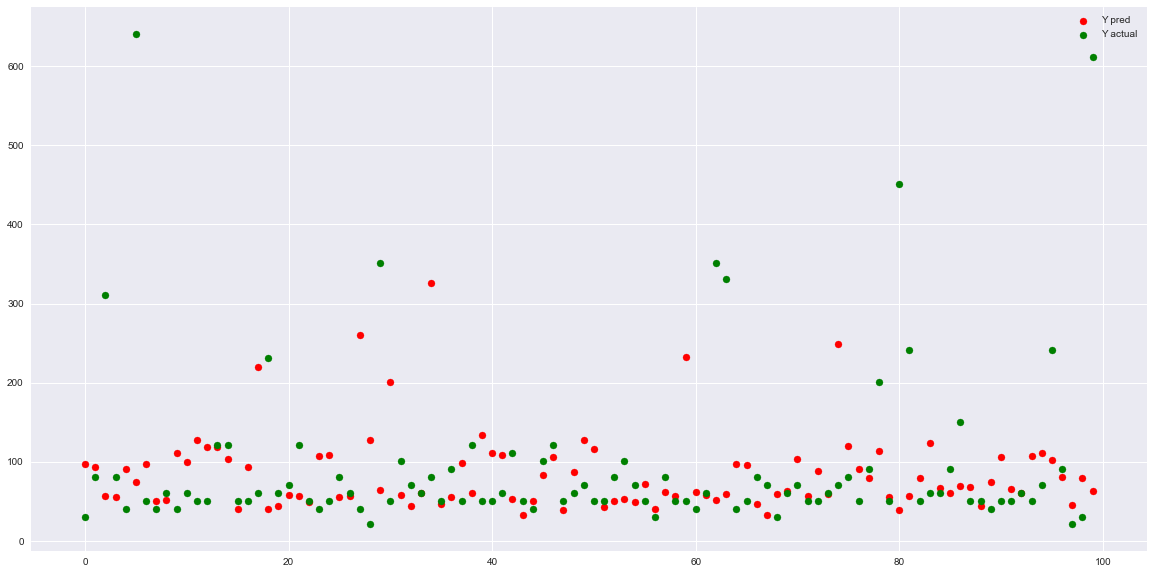

In [135]:
fig = plt.figure(figsize=(20,10))
plt.scatter(range(0,100), reshapeList[:100], c='r')
plt.scatter(range(0,100), inverse_log_app[:100], c='g')
plt.legend(['Y pred', 'Y actual'])

In [136]:
reshapeList2=np.reshape(validatePrediction[:,1:],2400)
reshapeList2

array([0.06530901, 2.5712241 , 0.67294935, ..., 2.47227321, 0.00959158,
       0.02877474])

In [137]:
reshapeList2 = np.e ** reshapeList2
reshapeList2

array([ 1.06748884, 13.08182817,  1.96000956, ..., 11.84935233,
        1.00963773,  1.02919274])

In [138]:
inverse_log_light = np.e ** (y_test['lights'])

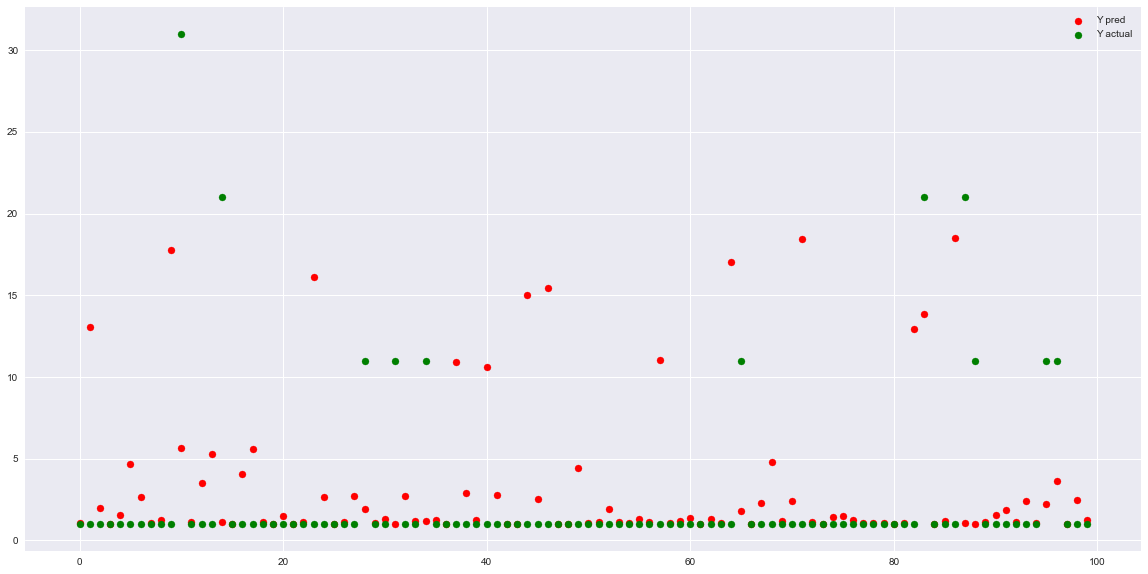

In [140]:
fig = plt.figure(figsize=(20,10))
plt.scatter(range(0,100), reshapeList2[:100], c='r')
plt.scatter(range(0,100), inverse_log_light[:100], c='g')
plt.legend(['Y pred', 'Y actual'])

In [143]:
meanAbsoluteErrorValidate=mean_absolute_error(y_test,validatePrediction,multioutput='raw_values')
meanAbsoluteErrorValidate

array([0.62387045, 1.03135703])

In [58]:
realPrediction=regressorValidate.predict(x_train)
realPrediction

array([[3.68079286, 0.02176967],
       [5.58451201, 1.97845221],
       [4.63541572, 0.00959158],
       ...,
       [4.70437504, 0.04362903],
       [3.88509211, 0.        ],
       [4.0057854 , 0.08891074]])

In [144]:
meanAbsoluteErrorValidate2=mean_absolute_error(y_train,realPrediction,multioutput='raw_values')
meanAbsoluteErrorValidate2

array([0.65246806, 1.04038294])